# Enunciado

## Visão Geral

Este dataset possui celulares de quatro faixas de preço e suas especificações. Ao final desta análise é desejado que seja escolhido um modelo para predição para definir a qual Tier (faixa de preço) um determinado celular pertence.


## Objetivos específicos

### Exploração dos Dados

1. Obtenha informações sobre o dataset. (0,5 PONTO)
2. Apresente análise estatística das colunas numéricas. (0,5 PONTO)
3. Escolha duas colunas numéricas e apresente graficamente sua distruição de frequências (histograma). (1,0 PONTO)
4. Apresente um Box-Plot da quantidade de memória RAM dos aparelhos. (1,0 PONTO)

### Pré-Processamento dos dados

1. Codifique as colunas categóricas (0,5 PONTO)
2. Separe o conjunto entre treino e teste (0,5 PONTO)
3. Normalize os dados numéricos. (1,0 PONTO)

### Modelo de *Machine Learning*

1. Utilize Random Forest, KNN e Naive Bayes. (3,0 PONTO)
2. Apresente as métricas: Acuracidade de treino, acuracidade de teste e matriz de confusão. Os dois modelos encontrados estão em cenário de Overfitting ou Underfitting? Justifique. (1 PONTO)
3. Escolha o modelo final com base nas métricas do item anterior. (1 PONTO)



# Dataset - Especificações de celulares

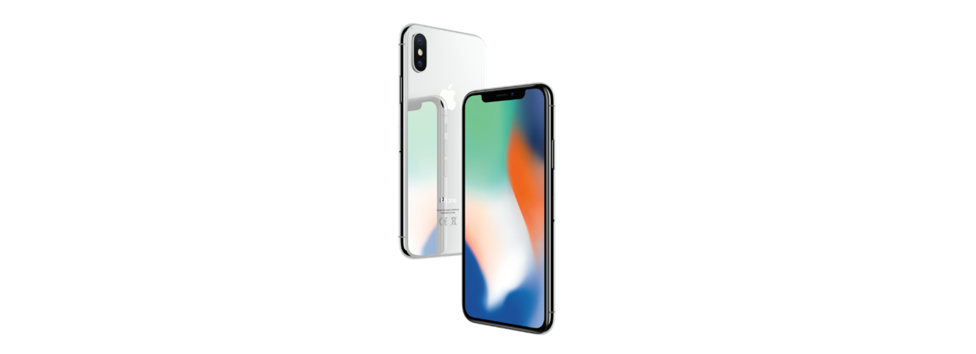

Informações sobre as colunas do conjunto de Dados:


* **potencia_bateria**: Capacidade máxima de carga da bateria
* **tem_bluetooth**: Se o celular tem bluetooth
* **clock_processador**: Frequência do processador
* **dual_sim**: Se o celular é dual sim
* **camera_frontal_MPixel**: Resoluão da camera frontal
* **tem_4G**: Se o celular tem 4G
* **memoria_interna**: Quantidade de espaço na memória interna
* **nucleos**: Quantidade de núcleos do processador
* **camera_traseira_MPixel**: Resoluão da camera principal
* **ram**: Quantidade de memória RAM
* **tem_3G**: Se o celular tem 3G
* **touch_screen**: Se o celular é touch
* **tem_wifi**: Se o celular tem wifi
* **tier**: Faixa de preço do celular (Target/Label/Rótulo)

In [ ]:
# Download dos dados
#fonte 1 - use este dataset:
!gdown 1Y5w_r9d7VfmAmy77B9eqdEgkqsYxR5F3
#fonte 2 - use este dataset:
#!gdown 133-uM4qDcYI2JkKXiYq4P11A4HH-0WaT
#fonte 3 - use este dataset:
#!gdown 1Aao7phsZcgS609k1SGg8U_U29wI0WKey

Downloading...
From: https://drive.google.com/uc?id=1Y5w_r9d7VfmAmy77B9eqdEgkqsYxR5F3
To: /content/celulares_1.csv
100% 107k/107k [00:00<00:00, 75.2MB/s]


## Importando as dependências necessárias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Carregar dataframe
obs.: Crie quantas células de código e texto que julgar necessário.

In [ ]:
df = pd.read_csv('celulares_1.csv')

Realizando uma cópia do Dataframe original para futuramente alterar uma cópia do DataFrame original:

In [ ]:
df_main = df.copy()

# Exploração dos dados


A exploração de dados é o processo de investigar e analisar conjuntos de dados para identificar padrões, tendências e insights ocultos. Sua importância reside em ajudar as organizações a tomar decisões informadas, otimizar processos e descobrir oportunidades de melhoria com base em informações valiosas extraídas dos dados.

## Obtendo informações sobre o dataset

In [ ]:
df_main

,potencia_bateria,tem_bluetooth,clock_processador,dual_sim,camera_frontal_MPixel,tem_4G,memoria_interna,nucleos,camera_traseira_MPixel,ram,tem_3G,touch_screen,tem_wifi,tier
0,842,nao,2.2,nao,1,nao,7,2,2,2549,nao,nao,sim,medio
1,1021,sim,0.5,sim,0,sim,53,3,6,2631,sim,sim,nao,alto
2,563,sim,0.5,sim,2,sim,41,5,6,2603,sim,sim,nao,alto
3,615,sim,2.5,nao,0,nao,10,6,9,2769,sim,nao,nao,alto
4,1821,sim,1.2,nao,13,sim,44,2,14,1411,sim,sim,nao,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,sim,0.5,sim,0,sim,2,6,14,668,sim,sim,nao,baixo
1996,1965,sim,2.6,sim,0,nao,39,4,3,2032,sim,sim,sim,alto
1997,1911,nao,0.9,sim,1,sim,36,8,3,3057,sim,sim,nao,premium
1998,1512,nao,0.9,nao,4,sim,46,5,5,869,sim,sim,sim,baixo


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_main, *['potencia_bateria'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_main, *['tem_bluetooth'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_main, *['clock_processador'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_main, *['dual_sim'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_main, *['potencia_bateria'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_main, *['tem_bluetooth'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_main, *['clock_processador'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_main, *['dual_sim'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_main, *[[['potencia_bateria', 'tem_bluetooth'], ['tem_bluetooth', 'clock_processador'], ['clock_processador', 'dual_sim'], ['dual_sim', 'camera_frontal_MPixel']]], **{})
chart

In [ ]:
df_main.shape

(2000, 14)

```shape``` foi utilizado para conferir a quantidade de linhas e colunas do Dataframe antes de ser tratado.

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   potencia_bateria        2000 non-null   int64  
 1   tem_bluetooth           2000 non-null   object 
 2   clock_processador       2000 non-null   float64
 3   dual_sim                2000 non-null   object 
 4   camera_frontal_MPixel   2000 non-null   int64  
 5   tem_4G                  2000 non-null   object 
 6   memoria_interna         2000 non-null   int64  
 7   nucleos                 2000 non-null   int64  
 8   camera_traseira_MPixel  2000 non-null   int64  
 9   ram                     2000 non-null   int64  
 10  tem_3G                  2000 non-null   object 
 11  touch_screen            2000 non-null   object 
 12  tem_wifi                2000 non-null   object 
 13  tier                    2000 non-null   object 
dtypes: float64(1), int64(6), object(7)
memor

O método ```info()``` foi utilizado para informar os tipos de cada coluna do DataFrame. Sendo assim, é possível inferir que o Dataframe possui uma coluna do tipo float, 6 colunas do tipo inteiro e 7 colunas categóricas (object).



In [ ]:
df_main.columns

Index(['potencia_bateria', 'tem_bluetooth', 'clock_processador', 'dual_sim',
       'camera_frontal_MPixel', 'tem_4G', 'memoria_interna', 'nucleos',
       'camera_traseira_MPixel', 'ram', 'tem_3G', 'touch_screen', 'tem_wifi',
       'tier'],
      dtype='object')

```columns``` foi utilizado para retornar uma lista com o nome das colunas do Dataframe original.

## Análise estatística das colunas numéricas.

In [ ]:
df_statistical = df_main.describe()
df_statistical

,potencia_bateria,clock_processador,camera_frontal_MPixel,memoria_interna,nucleos,camera_traseira_MPixel,ram
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,4.520500,9.916500,2124.213000
std,439.418206,0.816004,4.341444,18.145715,2.287837,6.064315,1084.732044
min,501.000000,0.500000,0.000000,2.000000,1.000000,0.000000,256.000000
25%,851.750000,0.700000,1.000000,16.000000,3.000000,5.000000,1207.500000
50%,1226.000000,1.500000,3.000000,32.000000,4.000000,10.000000,2146.500000
75%,1615.250000,2.200000,7.000000,48.000000,7.000000,15.000000,3064.500000
max,1998.000000,3.000000,19.000000,64.000000,8.000000,20.000000,3998.000000


O método ```describe()``` é utilizado para retornar a análise estatística das colunas numéricas.

## Distruição de frequências

#### Potencia da bateria (Histograma)
Histograma realizado com a coluna numérica "potencia_bateria", mostra a distribuição de frequência da potencia da bateria dos celulares dos dados.

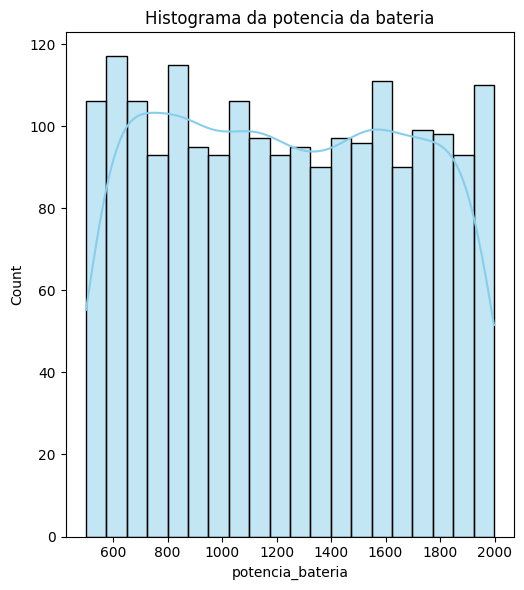

In [ ]:
potencia_bateria = 'potencia_bateria'

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_main[potencia_bateria], bins=20, kde=True, color='skyblue', edgecolor='k')
plt.title(f'Histograma da potencia da bateria')

plt.tight_layout()
plt.show()

#### Memória interna (Histograma)
Histograma realizado com a coluna numérica "memoria_interna", mostra a distribuição de frequência da memoria interna dos celulares dos dados.

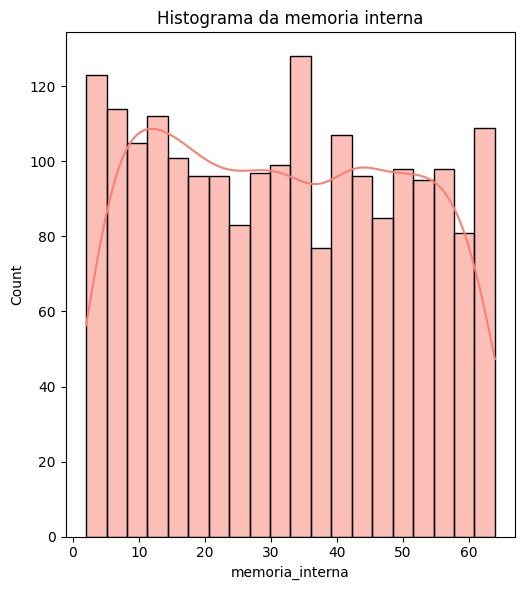

In [ ]:
memoria_interna = 'memoria_interna'

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
sns.histplot(df_main[memoria_interna], bins=20, kde=True, color='salmon', edgecolor='k')
plt.title(f'Histograma da memoria interna')

plt.tight_layout()
plt.show()


#### Memória RAM (Histograma)
Histograma realizado com a coluna numérica "ram", mostra a distribuição de frequência da memoria RAM dos celulares dos dados.

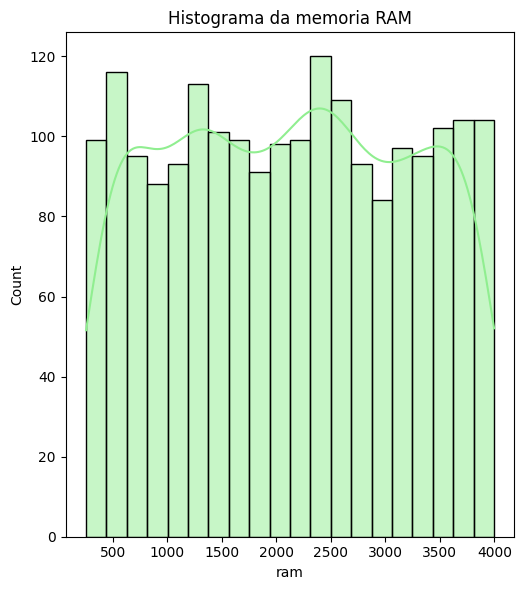

In [ ]:
memoria_ram = 'ram'

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
sns.histplot(df_main[memoria_ram], bins=20, kde=True, color='lightgreen', edgecolor='k')
plt.title(f'Histograma da memoria RAM')

plt.tight_layout()
plt.show()

## Box-Plot's

#### memória RAM dos aparelhos.

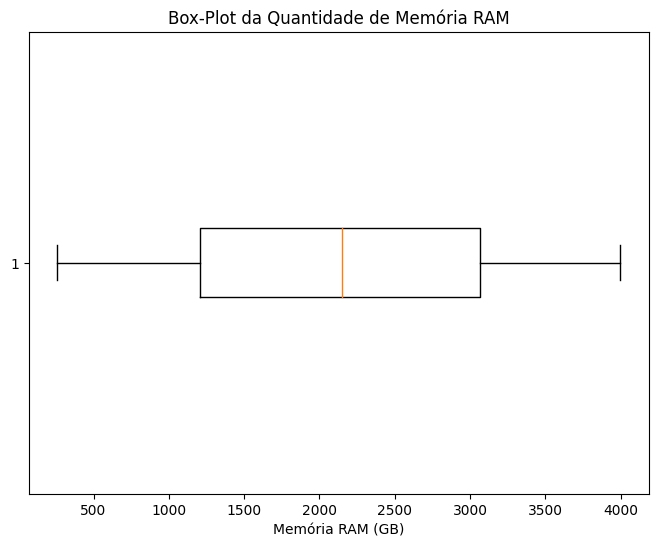

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_main['ram'], vert=False)
plt.title('Box-Plot da Quantidade de Memória RAM')
plt.xlabel('Memória RAM (GB)')
plt.show()

#### Potencia da bateria dos aparelhos.

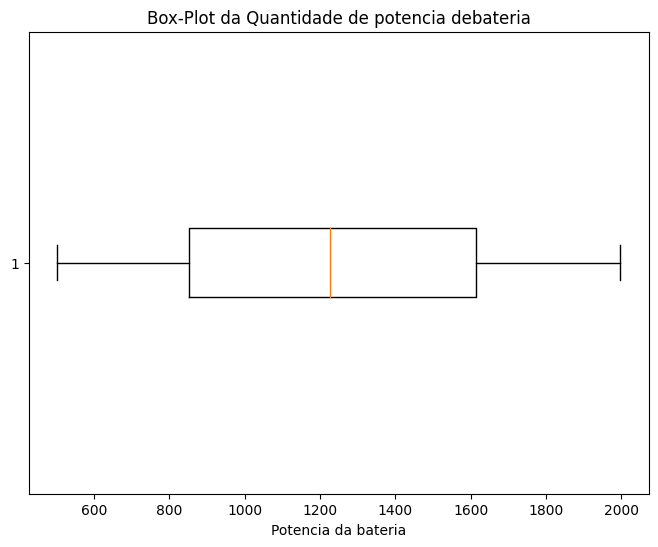

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_main['potencia_bateria'], vert=False)
plt.title('Box-Plot da Quantidade de potencia debateria')
plt.xlabel('Potencia da bateria')
plt.show()

#### Memória interna dos aparelhos.

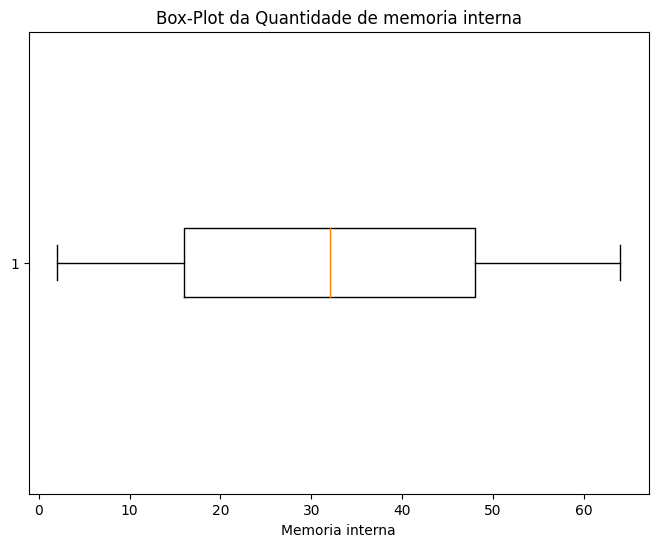

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_main['memoria_interna'], vert=False)
plt.title('Box-Plot da Quantidade de memoria interna')
plt.xlabel('Memoria interna')
plt.show()

# Pré-processamento dos dados
O pré-processamento de dados é o conjunto de etapas iniciais no tratamento de dados, incluindo limpeza, normalização e seleção de recursos, com o objetivo de preparar os dados para análise ou modelagem. Sua importância reside em garantir que os dados estejam de alta qualidade e em um formato adequado, o que contribui para resultados mais precisos e insights confiáveis.

## Codificação de colunas categóricas
A codificação de colunas categóricas envolve a transformação de variáveis categóricas em valores numéricos que possam ser utilizados em modelos de machine learning. Isso é importante, pois muitos algoritmos requerem entradas numéricas.

In [ ]:
#armazena apenas as colunas categoricas (object) do Dataframe
categorical_columns = df_main.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_main[column] = label_encoder.fit_transform(df_main[column])

df_main

,potencia_bateria,tem_bluetooth,clock_processador,dual_sim,camera_frontal_MPixel,tem_4G,memoria_interna,nucleos,camera_traseira_MPixel,ram,tem_3G,touch_screen,tem_wifi,tier
0,842,0,2.2,0,1,0,7,2,2,2549,0,0,1,2
1,1021,1,0.5,1,0,1,53,3,6,2631,1,1,0,0
2,563,1,0.5,1,2,1,41,5,6,2603,1,1,0,0
3,615,1,2.5,0,0,0,10,6,9,2769,1,0,0,0
4,1821,1,1.2,0,13,1,44,2,14,1411,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,6,14,668,1,1,0,1
1996,1965,1,2.6,1,0,0,39,4,3,2032,1,1,1,0
1997,1911,0,0.9,1,1,1,36,8,3,3057,1,1,0,3
1998,1512,0,0.9,0,4,1,46,5,5,869,1,1,1,1


Nesta etapa, as colunas categóricas foram codificadas para que possam ser usadas como entradas em algoritmos de aprendizado de máquina ou análises estatísticas.
Em colunas de 'sim' e 'não' foram transformadas em 1 e 0 respectivamente, também chamado de one-hot encoding.

Já as colunas com mais opções foram transformadas em números, como o exemplo da coluna tier, onde:
Baixo = 1
Médio = 2
Alto = 0
Premium = 3

## Conjunto de treino e teste
Separar os dados em treino e teste é crucial para avaliar o desempenho de um modelo de machine learning. Isso permite verificar a capacidade do modelo de generalizar padrões para novos dados, evitando o overfitting. Além disso, ajuda a garantir a confiabilidade das previsões e a otimizar a escolha dos hiperparâmetros do modelo.

In [ ]:
features = df_main.drop(columns=['tier'])
target = df_main['tier']

# divide o conjunto de dados em treino (80%) e teste (20%).
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Normalização de dados numéricos
A normalização de dados é o processo de ajustar valores em um conjunto de dados para que eles estejam em uma escala comum. Isso é importante em análises e aprendizado de máquina, pois ajuda a evitar que recursos com diferentes escalas dominem o modelo, garantindo resultados mais precisos e equilibrados.

In [ ]:
numeric_columns = ['tem_bluetooth', 'potencia_bateria', 'clock_processador', 'dual_sim', 'camera_frontal_MPixel', 'tem_4G', 'memoria_interna', 'nucleos', 'camera_traseira_MPixel', 'ram', 'tem_3G', 'touch_screen', 'tem_wifi']

scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


# Seleção de Atributos: Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import learning_curve

### Modelo de *Machine Learning*

### Random Forest

##### Treinando o modelo


In [ ]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)


##### Acurácia de treinamento e teste - Random Forest

In [ ]:
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)

print("Acurácia de Treinamento - Random Forest:", rf_train_accuracy)
print("Acurácia de Teste - Random Forest:", rf_test_accuracy)

Acurácia de Treinamento - Random Forest: 1.0
Acurácia de Teste - Random Forest: 0.805


##### Matriz de confusão - Random Forest

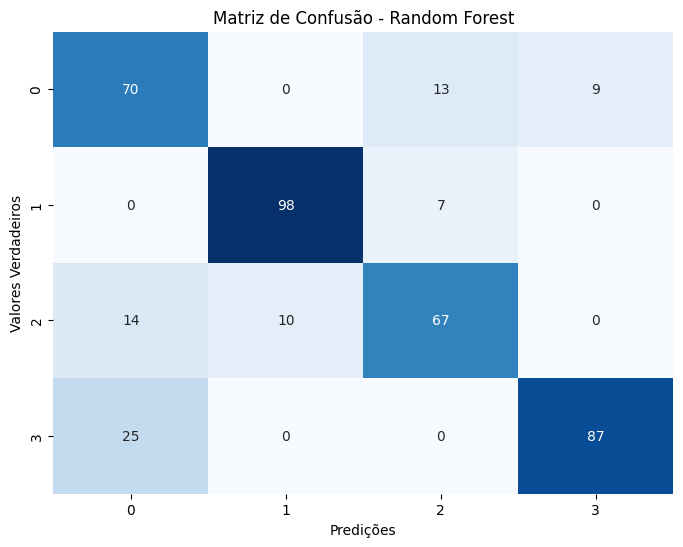

In [ ]:
rf_confusion_matrix = confusion_matrix(y_test, rf_test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')

plt.title('Matriz de Confusão - Random Forest')

plt.show()

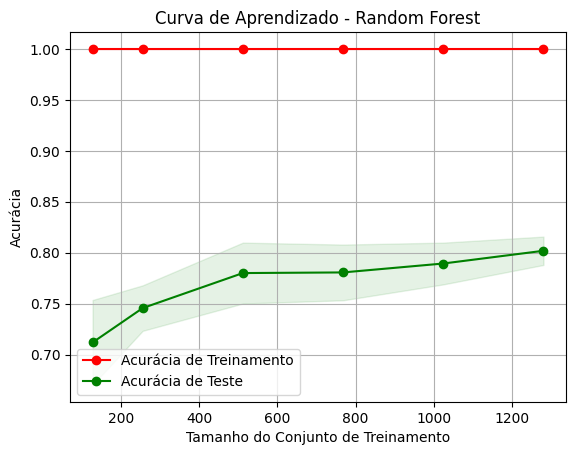

In [ ]:
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=train_sizes, n_jobs=-1):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Tamanho do Conjunto de Treinamento")
    plt.ylabel("Acurácia")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, n_jobs=n_jobs)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Acurácia de Treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Acurácia de Teste")

    plt.legend(loc="best")
    return plt

title = "Curva de Aprendizado - Random Forest"
plot_learning_curve(rf_model, title, X_train, y_train, cv=None, n_jobs=-1)

plt.show()

Nesse caso, a acurácia de treinamento é muito alta (1.0), o que sugere que o modelo Random Forest se ajustou perfeitamente aos dados de treinamento, podendo ser uma indicação de overfitting. Todavia, a acurácia de teste permanece alta também, indicando que se adequou aos dados de teste.
No gráfico da célula acima a curva de teste esta abaixo da curva de treinamento, indicando overfitting.

### KNN

##### Treinando o modelo


In [ ]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

knn_train_preds = knn_model.predict(X_train)
knn_test_preds = knn_model.predict(X_test)

##### Acurácia de treinamento e teste - KNN

In [ ]:
knn_train_accuracy = accuracy_score(y_train, knn_train_preds)
knn_test_accuracy = accuracy_score(y_test, knn_test_preds)

print("Acurácia de Treinamento - KNN:", knn_train_accuracy)
print("Acurácia de Teste - KNN:", knn_test_accuracy)

Acurácia de Treinamento - KNN: 0.701875
Acurácia de Teste - KNN: 0.555


##### Matriz de confusão - KNN

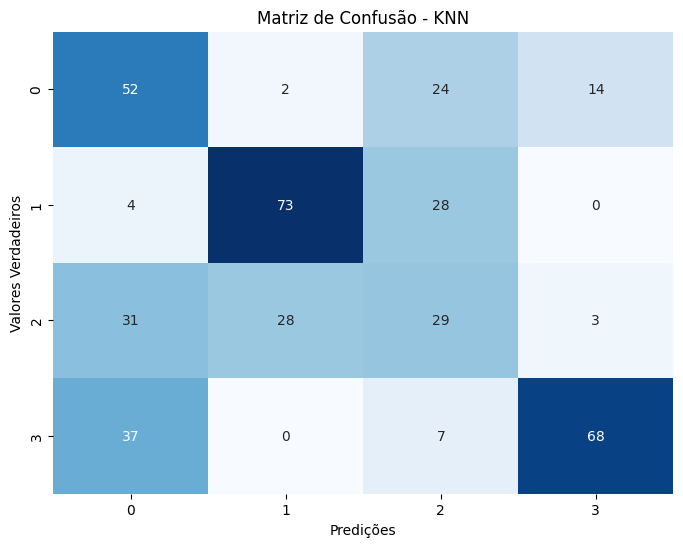

In [ ]:
knn_confusion_matrix = confusion_matrix(y_test, knn_test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')

plt.title('Matriz de Confusão - KNN')

plt.show()

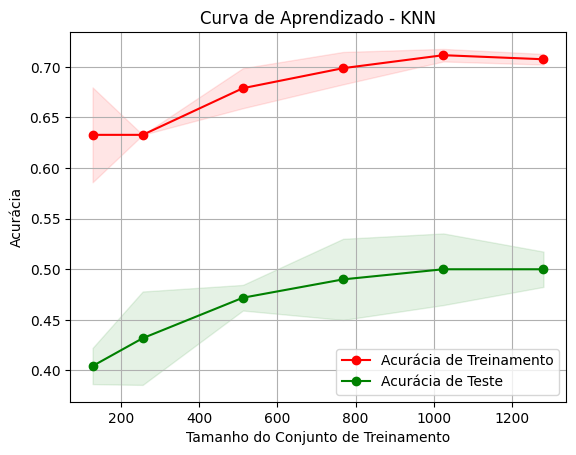

In [ ]:
title = "Curva de Aprendizado - KNN"
plot_learning_curve(knn_model, title, X_train, y_train, cv=None, n_jobs=-1)

plt.show()


A diferença entre a acurácia de treinamento e teste é significativa, o que sugere que o modelo KNN está em cenário de overfitting, pois não está generalizando bem para novos dados. Além da acurácia de teste não ser suficiente para o modelo, no gráfico da célula acima a curva de teste esta abaixo da curva de treinamento, indicando overfitting. Sendo assim, o modelo feito com algoritmo KNN não é adequado.

### Naive Bayes

##### Treinando o modelo

In [ ]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

nb_train_preds = nb_model.predict(X_train)
nb_test_preds = nb_model.predict(X_test)

##### Acurácia de treinamento e teste - Naive Bayes

In [ ]:
nb_train_accuracy = accuracy_score(y_train, nb_train_preds)
nb_test_accuracy = accuracy_score(y_test, nb_test_preds)

print("Acurácia de Treinamento - Naive Bayes:", nb_train_accuracy)
print("Acurácia de Teste - Naive Bayes:", nb_test_accuracy)

Acurácia de Treinamento - Naive Bayes: 0.7775
Acurácia de Teste - Naive Bayes: 0.775


##### Matriz de confusão - Naive Bayes

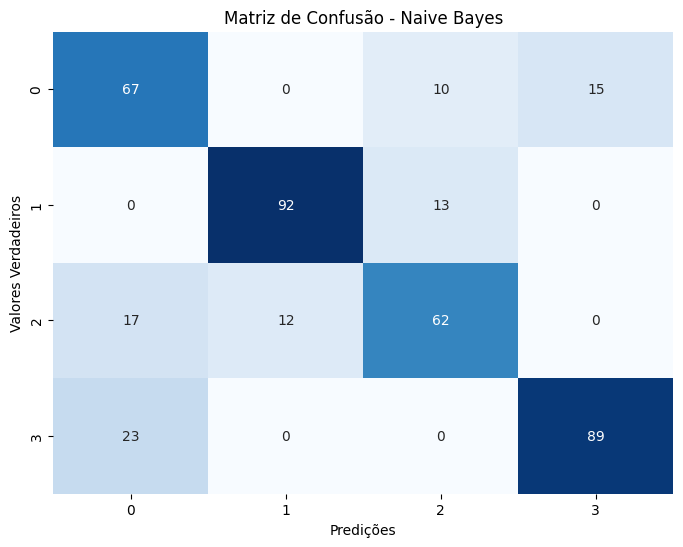

In [ ]:
nb_confusion_matrix = confusion_matrix(y_test, nb_test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')

plt.title('Matriz de Confusão - Naive Bayes')

plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

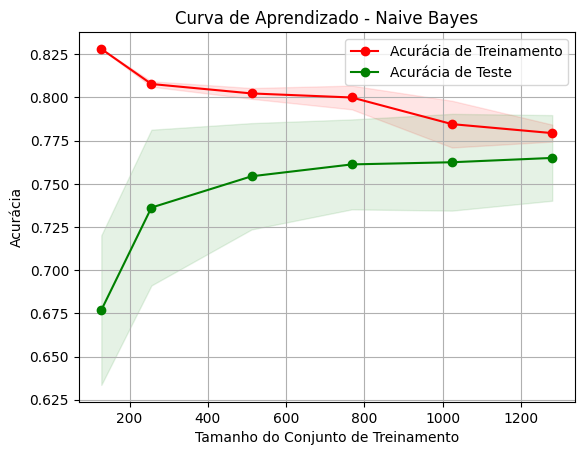

In [ ]:
title = "Curva de Aprendizado - Naive Bayes"
plot_learning_curve(nb_model, title, X_train, y_train, cv=None, n_jobs=-1)

Nesse caso, a diferença entre a acurácia de treinamento e teste é pequena, o que sugere que o modelo Naive Bayes está em uma situação de overfitting moderado. Na célula acima, nota-se que a curva de teste também está abaixo da de treinamento, todavia, a diferença de acurácia de ambas é muito baixa.

# Escolha


Primeiramente, observou-se as métricas de acurácia, que são frequentemente usadas para avaliar o desempenho de modelos de classificação. O Random Forest exibiu uma acurácia notavelmente alta no conjunto de teste, atingindo 80.5%. Isso indica que o modelo é capaz de fazer previsões precisas em relação às classes de interesse em nossos dados de teste.
Além disso, examinou-se a diferença entre as acurácias de treinamento e teste como um indicador de overfitting ou underfitting. No caso do Random Forest, embora a acurácia de treinamento tenha sido perfeita (100%), a diferença entre as acurácias de treinamento e teste não foi excessivamente grande, sugerindo que o modelo é capaz de generalizar bem para novos dados, evitando overfitting.
Um aspecto crucial da decisão foi a matriz de confusão. Nota-se que o Random Forest apresentou uma matriz de confusão com valores próximos de 1 na diagonal principal, o que indica que o modelo está fazendo previsões altamente precisas para as classes-alvo.

Entretanto, a observou-se que, as acurácias do teste e treinamento no modelo Naive Bayes são quase a mesma,  isso pode indicar que o modelo está conseguindo generalizar bem para os dados de teste e não está sofrendo de overfitting ou underfitting significativos. Uma característica do Naive Bayes é a sua simplicidade e capacidade de aprender a partir de pouca quantidade de dados de forma eficiente, o que pode levar a uma boa generalização. Quando as acurácias de treinamento e teste são semelhantes, isso sugere que o modelo está ajustando-se bem aos dados de treinamento e conseguindo aplicar o mesmo aprendizado aos dados de teste.
Nesse cenário, o modelo Naive Bayes pode ser uma escolha sólida, especialmente se a acurácia global for satisfatória.
Além disso, matriz de confusão do modelo Naive Bayes tem valores na diagonal relativamente satisfatórios, isso é uma boa indicação de que o modelo está fazendo previsões precisas. Uma alta diagonal principal na matriz de confusão sugere que o modelo está acertando a maioria das previsões, o que é um bom sinal de desempenho.

Como conclusão, a escolha de modelo foi o Random Forest, por conta de ser o melhor desempenho no conjunto de teste, a análise adicional da matriz de confusão também apontou para os méritos do Random Forest.